# Function Approximation

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## Select function to approximate: (linear, cubic, sine, tanh, xor, complex)

In [2]:
function = input('Indicate function: ')

Indicate function: tanh


### Import linear data

In [3]:
if function == 'linear' :
    dataset = pd.read_csv('1in_linear.txt', sep=" ", header=None, delimiter="\t")
    x = dataset.iloc[:, 0 ].values
    y = dataset.iloc[:, 1 ].values
    y_actual = np.asarray([i for i in x])
    label = 'Linear'
    xplot = x
    dimension = 1


### Import cubic data

In [4]:
if function == 'cubic' :
    dataset = pd.read_csv('1in_cubic.txt', sep="\s+", header=None, delimiter="\s+")
    x = dataset.iloc[:, 0 ].values
    y = dataset.iloc[:, 1 ].values
    y_actual = np.asarray([pow(i,3) for i in x])
    label = 'Cubic'
    xplot = x
    dimension = 1

### Import sine data

In [5]:
if function == 'sine' :
    dataset = pd.read_csv('1in_sine.txt', sep="\s+", header=None, delimiter="\s+")
    x = dataset.iloc[:, 0 ].values
    y = dataset.iloc[:, 1 ].values
    y_actual = np.asarray([np.sin(-i*np.pi) for i in x])
    label = 'Sine'
    xplot = x
    dimension = 1

### Import tanh data

In [6]:
if function == 'tanh' :
    dataset = pd.read_csv('1in_tanh.txt', sep="\s+", header=None, delimiter="\s+")
    x = dataset.iloc[:, 0 ].values
    y = dataset.iloc[:, 1 ].values
    y_actual = np.asarray([np.tanh((pow(np.pi,2))*i) for i in x])
    label = 'Tanh'
    xplot = x
    dimension = 1

### Import xor data

In [7]:
if function == 'xor' :
    dataset = pd.read_csv('2in_xor.txt', sep="\s+", header=None, delimiter="\s+")
    x = dataset.iloc[:, 0:2 ].values
    x1 = dataset.iloc[:, 0 ].values
    x2 = dataset.iloc[:, 1 ].values
    y = dataset.iloc[:, 2 ].values
    x1 = np.array(x1, dtype=bool)
    x2 = np.array(x2, dtype=bool)
    y_actual = np.array(x1^x2, dtype=int)
    label = 'XOR'
    xplot = x1
    dimension = 2

### Import complex data

In [8]:
if function == 'complex' :
    dataset = pd.read_csv('2in_complex.txt', sep="\s+", header=None, delimiter="\s+")
    x = dataset.iloc[:, 0:2 ].values
    x1 = dataset.iloc[:, 0 ].values
    x2 = dataset.iloc[:, 1 ].values
    y = dataset.iloc[:, 2 ].values
    y_actual= 1.9*(1.35+(np.exp(x1-x2))*(np.sin((13*(pow((x1-0.6),2))))*(np.sin(7*x2))))
    label = 'Complex'
    xplot = x1
    dimension = 2

## Initilise ANN

In [9]:
ann = Sequential()
ann.add(Dense(10, input_dim=dimension, activation='relu', kernel_initializer='he_uniform'))
ann.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
ann.add(Dense(1))

## Compile and run ANN

In [10]:
ann.compile(loss='mse', optimizer='adam')

In [11]:
ann.fit(x, y, epochs=100, batch_size=10)

Epoch 1/100
11/11 [==============================] - 0s 686us/step - loss: 1.7298
Epoch 2/100
11/11 [==============================] - 0s 746us/step - loss: 1.4991
Epoch 3/100
11/11 [==============================] - 0s 548us/step - loss: 1.3269
Epoch 4/100
11/11 [==============================] - 0s 637us/step - loss: 1.1696
Epoch 5/100
11/11 [==============================] - 0s 578us/step - loss: 1.0408
Epoch 6/100
11/11 [==============================] - 0s 535us/step - loss: 0.9219
Epoch 7/100
11/11 [==============================] - 0s 543us/step - loss: 0.8323
Epoch 8/100
11/11 [==============================] - 0s 681us/step - loss: 0.7613
Epoch 9/100
11/11 [==============================] - 0s 594us/step - loss: 0.6977
Epoch 10/100
11/11 [==============================] - 0s 556us/step - loss: 0.6460
Epoch 11/100
11/11 [==============================] - 0s 524us/step - loss: 0.5923
Epoch 12/100
11/11 [==============================] - 0s 605us/step - loss: 0.5535
Epoch 13/100


11/11 [==============================] - 0s 515us/step - loss: 0.0586
Epoch 100/100
11/11 [==============================] - 0s 561us/step - loss: 0.0565


In [12]:
yhat = ann.predict(x)

## Print Mean Squared Error and plot comparison

In [13]:
print('MSE: %.3f' %mean_squared_error(y_actual, yhat))

MSE: 0.055


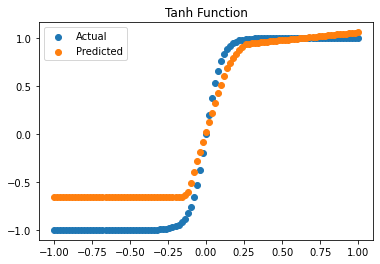

In [14]:
plt.scatter(xplot, y_actual, label = 'Actual')
plt.scatter(xplot, yhat, label = 'Predicted')
plt.title(label + ' Function')
plt.legend()
plt.show()